In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('ObesityDataset.csv')

In [3]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [5]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
df.shape

(2111, 17)

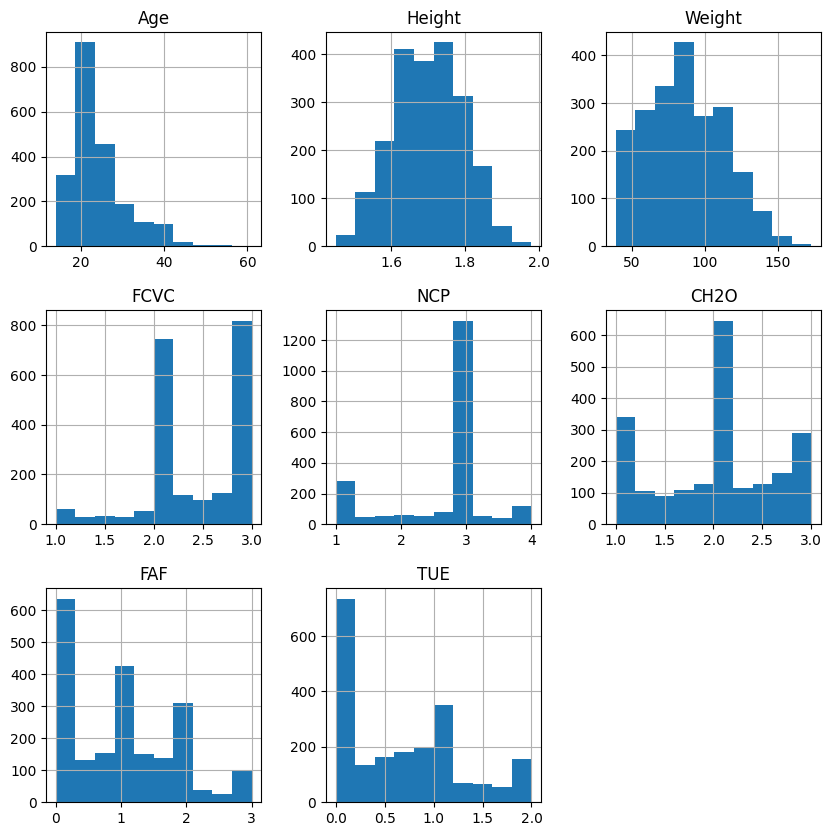

In [7]:
df.hist(figsize=(10,10))
plt.show()

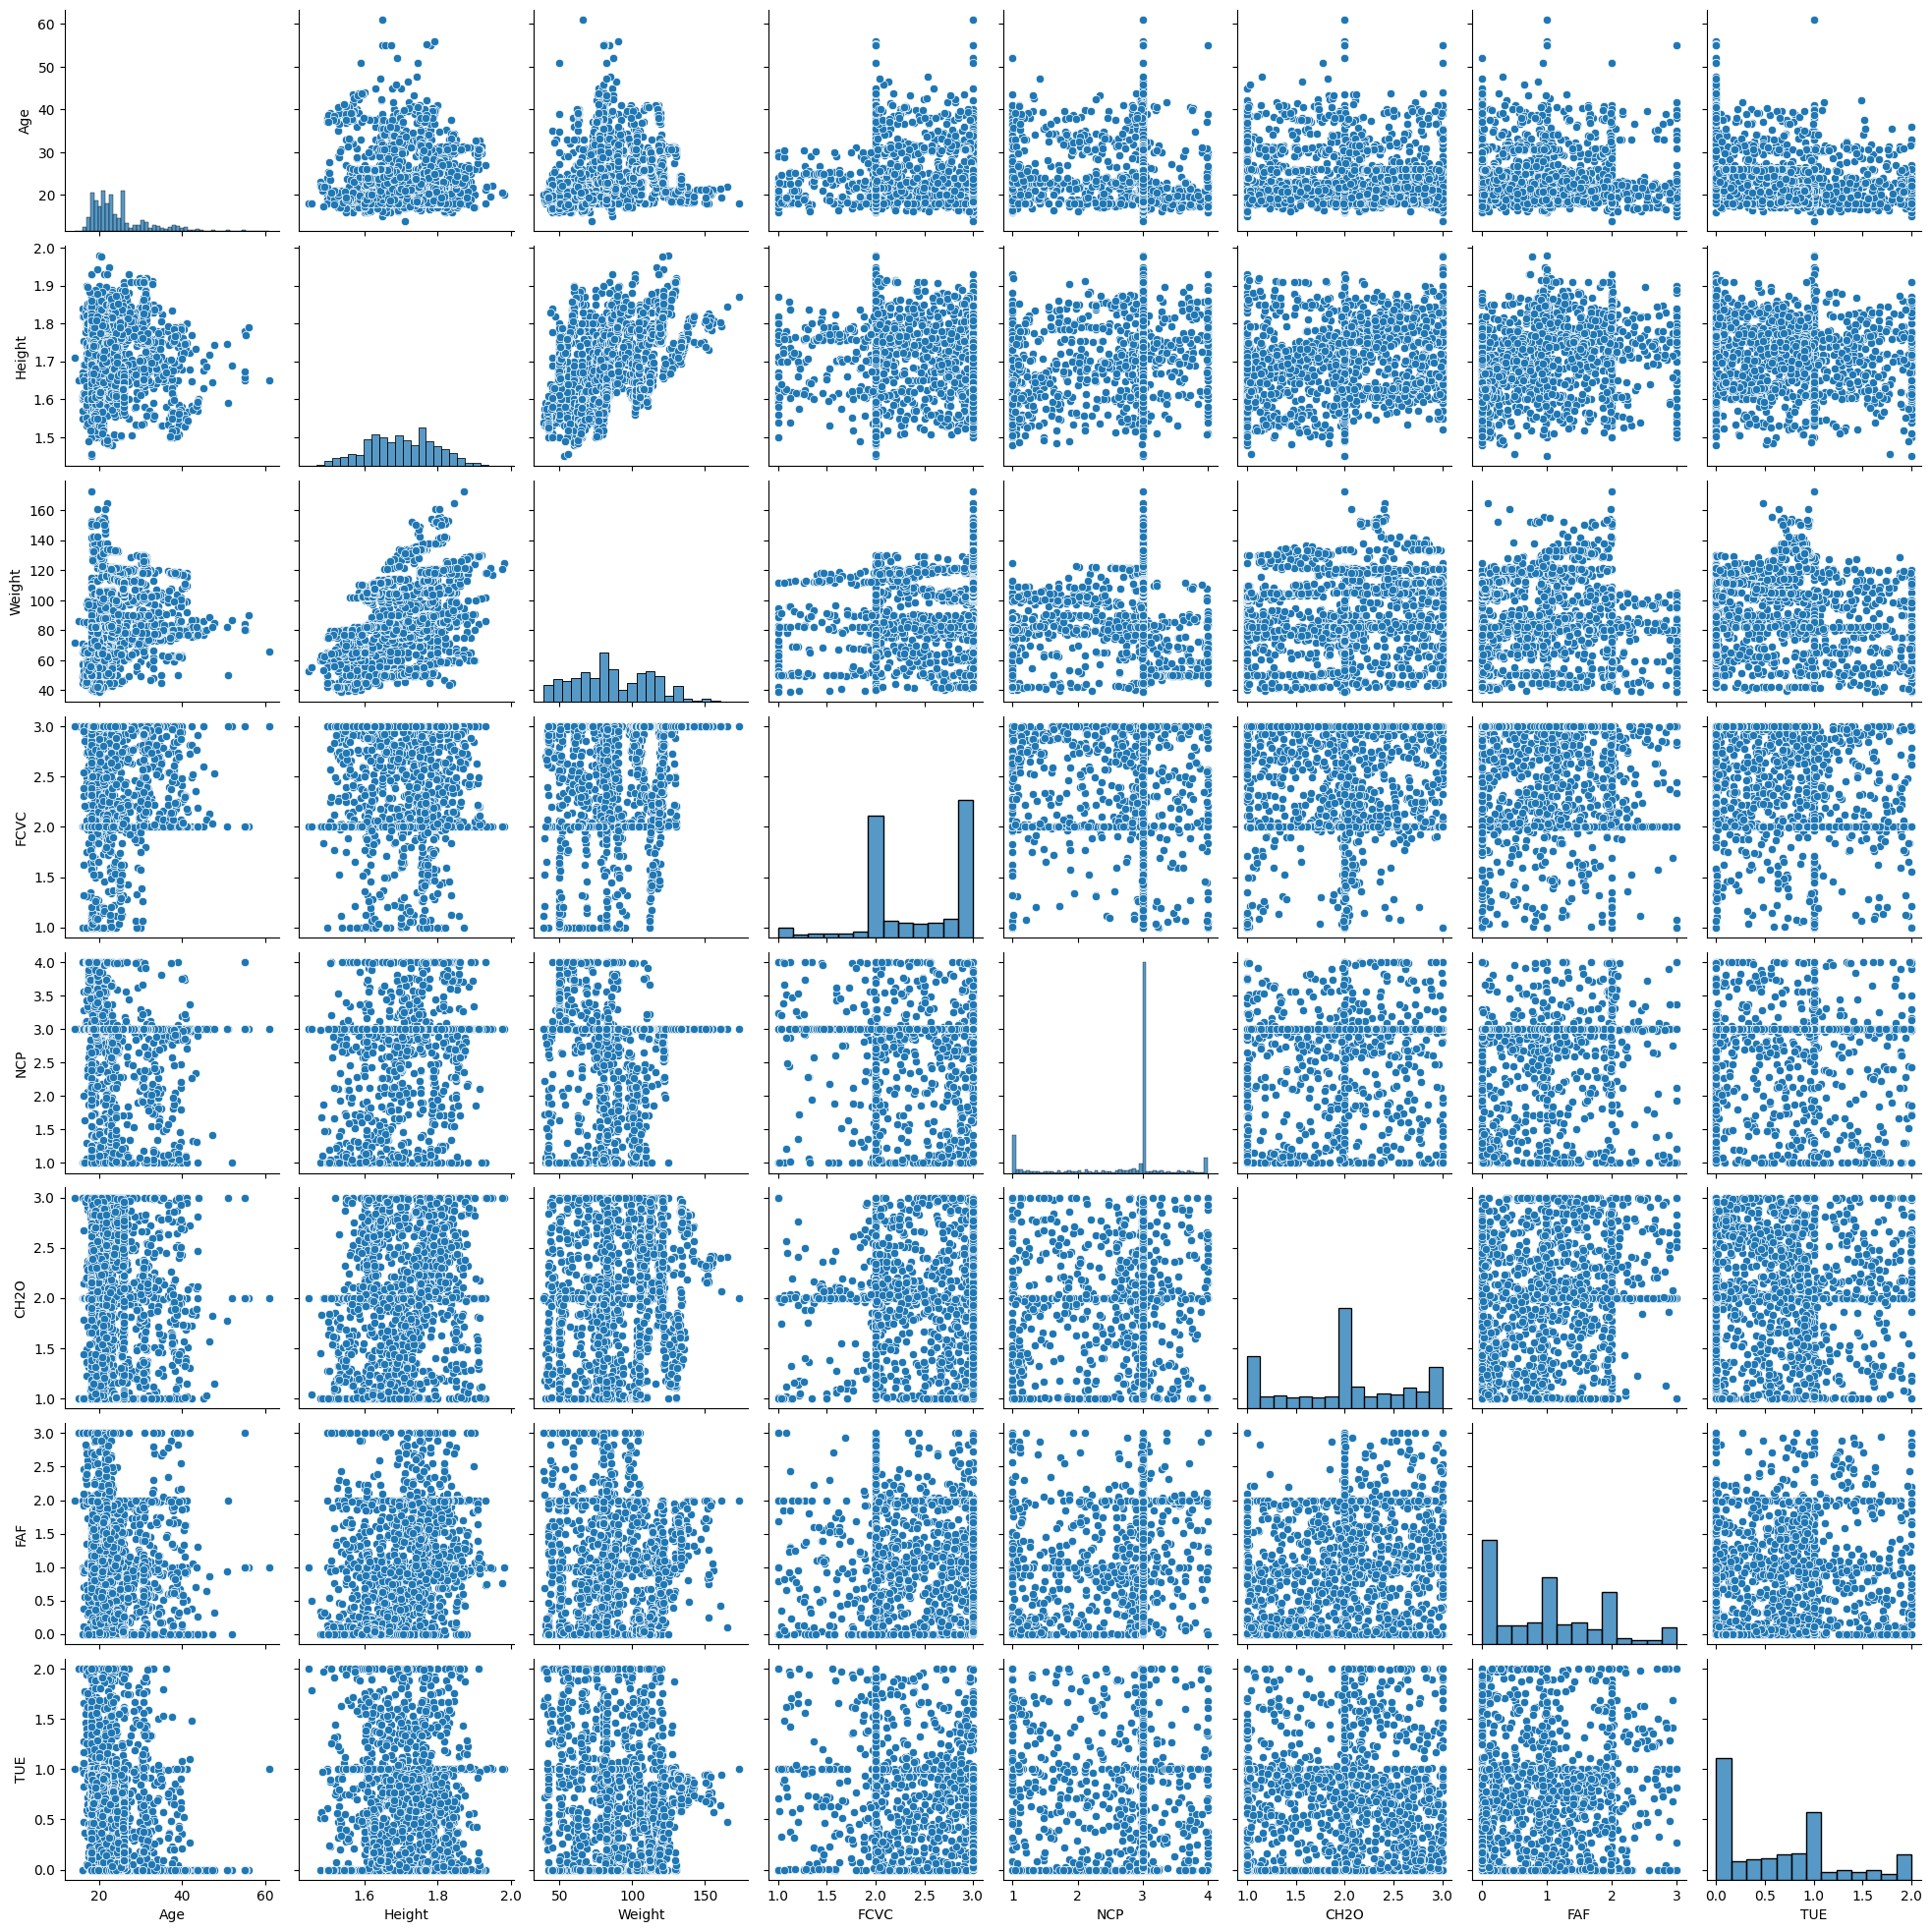

In [8]:
sns.pairplot(df)

<Axes: >

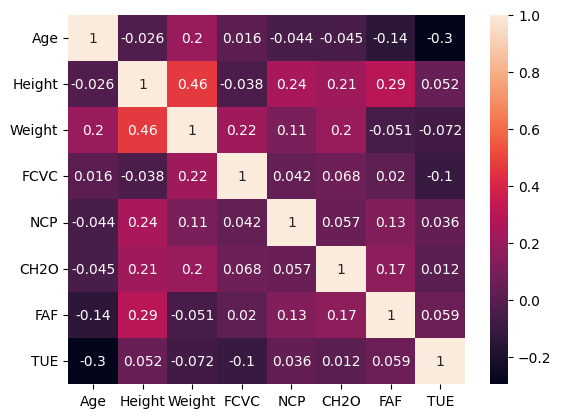

In [9]:
# plt.figure(figsize=(15,15))
sns.heatmap(df.corr(numeric_only=True),annot=True)


In [10]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
df.describe(include=object)

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1401,1866,2015,2067,1726,1765,1580,351


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [13]:
NewList=['FAVC','SCC','SMOKE','family_history_with_overweight']

In [14]:
gender_mapping = {'Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].map(gender_mapping)

In [15]:
df[NewList]=df[NewList].apply(lambda x: x.map({'yes':1, 'no':0}))

In [16]:
df.describe(include=object)

,CALC,CAEC,MTRANS,NObeyesdad
count,2111,2111,2111,2111
unique,4,4,5,7
top,Sometimes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1401,1765,1580,351


In [17]:
calc=pd.get_dummies(df.CALC, dtype=int, prefix='CALC')

In [18]:
df=pd.concat((df,calc), axis=1)

In [19]:
caec=pd.get_dummies(df.CAEC, dtype=int, prefix='CAEC')
df=pd.concat((df,caec),axis=1)

In [20]:
mtrans=pd.get_dummies(df.MTRANS, dtype=int, prefix='MTRANS')
df=pd.concat((df,mtrans), axis=1)

In [21]:
df=df.drop('CALC',axis=1)

In [22]:
df=df.drop(('CAEC'),axis=1)

In [23]:
df=df.drop('MTRANS',axis=1)

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Gender,2111.0,0.505921,0.500083,0.00,0.000000,1.000000,1.000000,1.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FAVC,2111.0,0.883941,0.320371,0.00,1.000000,1.000000,1.000000,1.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
SCC,2111.0,0.045476,0.208395,0.00,0.000000,0.000000,0.000000,1.00
SMOKE,2111.0,0.020843,0.142893,0.00,0.000000,0.000000,0.000000,1.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00


In [25]:
df_train,df_test=train_test_split(df,train_size=0.70,random_state=100)

In [26]:
sc=StandardScaler()

In [27]:
num=['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']

In [28]:
df_train[num]=sc.fit_transform(df_train[num])

In [29]:
df_test[num]=sc.transform(df_test[num])

In [30]:
df.shape

(2111, 27)

In [31]:
y_train=df_train.pop('NObeyesdad')
x_train=df_train
y_test=df_test.pop('NObeyesdad')
x_test=df_test

In [32]:
lr=LogisticRegression()

In [33]:
lg=LogisticRegression()

In [34]:
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred=lr.predict(x_train)

In [36]:
((y_pred==y_train).sum()/len(y_pred))*100

90.18280297901151

In [37]:
Y_pred=lr.predict(x_test)

In [38]:
((Y_pred==y_test).sum()/len(Y_pred))*100

87.53943217665615

In [39]:
# rfe=RFE(lg)

In [40]:
# rfe.fit(x_train,y_train)

In [41]:
# list(zip(x_train.columns,rfe.support_,rfe.ranking_))

In [42]:
cm=metrics.confusion_matrix(y_test,Y_pred)

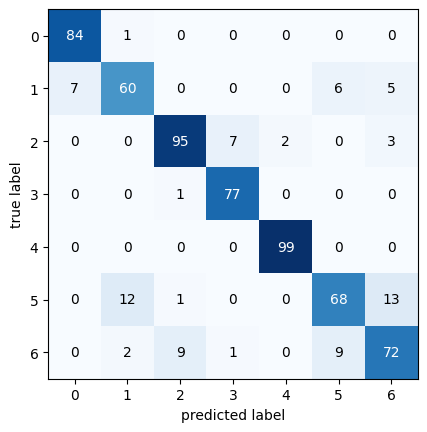

In [43]:
plot_confusion_matrix(cm)
plt.show()

In [44]:
report=classification_report(y_train,y_pred,output_dict=True)
reportDf=pd.DataFrame(report)

In [45]:
print(reportDf)

           Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
precision             0.901478       0.897297        0.957627   
recall                0.978610       0.794258        0.926230   
f1-score              0.938462       0.842640        0.941667   
support             187.000000     209.000000      244.000000   

           Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
precision         0.943478          0.986784            0.791878   
recall            0.990868          0.995556            0.795918   
f1-score          0.966592          0.991150            0.793893   
support         219.000000        225.000000          196.000000   

           Overweight_Level_II  accuracy    macro avg  weighted avg  
precision             0.804020  0.901828     0.897509      0.901842  
recall                0.812183  0.901828     0.899089      0.901828  
f1-score              0.808081  0.901828     0.897498      0.901055  
support             197.000000  0.901828  1477.000000

In [46]:
dt=DecisionTreeClassifier()

In [47]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred=dt.predict(x_test)

In [49]:
((y_pred==y_test).sum()/len(y_test))*100

92.58675078864354

In [50]:
nb=GaussianNB()

In [51]:
nb.fit(x_train,y_train)

GaussianNB()

In [52]:
y_pred=nb.predict(x_test)

In [53]:
((y_pred==y_test).sum()/len(y_test))*100

56.46687697160884

In [54]:
# plt.figure(figsize=(10,10))
# plot_tree(dt)
# plt.show()

In [55]:
print(num)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [56]:
df[num]=sc.transform(df[num])
y=df.pop('NObeyesdad')
x=df

In [57]:
ac=[]
skf=StratifiedKFold(n_splits=10, random_state=50, shuffle=True)
for i,j in skf.split(x,y):
    x_train=x.iloc[i]
    y_train=y[i]
    x_test=x.iloc[j]
    y_test=y[j]
    lr=LogisticRegression(penalty='l2',max_iter=10000)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    accu=metrics.accuracy_score(y_test,y_pred)*100
    ac.append(accu)
    print(accu)
np.mean(ac)

87.26415094339622
89.0995260663507
85.78199052132702
88.15165876777252
88.62559241706161
87.67772511848341
90.99526066350711
89.57345971563981
88.15165876777252
92.89099526066352


88.82120182419746

In [58]:
ac2=[]
for i,j in skf.split(x,y):
    x_train=x.iloc[i]
    y_train=y[i]
    x_test=x.iloc[j]
    y_test=y[j]
    tr=DecisionTreeClassifier()
    tr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    accu=metrics.accuracy_score(y_test,y_pred)*100
    ac2.append(accu)
    print(accu)
np.mean(ac2)

88.20754716981132
91.4691943127962
88.62559241706161
90.99526066350711
90.99526066350711
90.99526066350711
91.9431279620853
91.4691943127962
88.62559241706161
92.89099526066352


90.62170258427972

In [59]:
ac3=[]
nb=GaussianNB()
for i,j in skf.split(x,y):
    x_train=x.iloc[i]
    y_train=y[i]
    x_test=x.iloc[j]
    y_test=y[j]
    nb.fit(x_train,y_train)
    y_pred=nb.predict(x_test)
    accu=metrics.accuracy_score(y_test,y_pred)*100
    print(accu)
    ac3.append(accu)
np.mean(ac3)

57.07547169811321
53.55450236966824
54.976303317535546
55.45023696682464
55.92417061611374
51.65876777251185
59.241706161137444
58.767772511848335
51.18483412322274
55.92417061611374


55.37579361530895

In [60]:
ac4=[]
for i,j in skf.split(x,y):
    x_train=x.iloc[i]
    y_train=y[i]
    x_test=x.iloc[j]
    y_test=y[j]
    kn=KNeighborsClassifier(n_neighbors=int(np.sqrt(y_train.shape[0])))
    kn.fit(x_train,y_train)
    y_pred=kn.predict(x_test)
    accu=metrics.accuracy_score(y_test,y_pred)*100
    ac4.append(accu)
    print(ac4)
np.mean(ac4)

[70.28301886792453]
[70.28301886792453, 68.72037914691943]
[70.28301886792453, 68.72037914691943, 74.40758293838863]
[70.28301886792453, 68.72037914691943, 74.40758293838863, 76.30331753554502]
[70.28301886792453, 68.72037914691943, 74.40758293838863, 76.30331753554502, 69.19431279620854]
[70.28301886792453, 68.72037914691943, 74.40758293838863, 76.30331753554502, 69.19431279620854, 71.09004739336493]
[70.28301886792453, 68.72037914691943, 74.40758293838863, 76.30331753554502, 69.19431279620854, 71.09004739336493, 72.98578199052133]
[70.28301886792453, 68.72037914691943, 74.40758293838863, 76.30331753554502, 69.19431279620854, 71.09004739336493, 72.98578199052133, 71.56398104265402]
[70.28301886792453, 68.72037914691943, 74.40758293838863, 76.30331753554502, 69.19431279620854, 71.09004739336493, 72.98578199052133, 71.56398104265402, 69.19431279620854]
[70.28301886792453, 68.72037914691943, 74.40758293838863, 76.30331753554502, 69.19431279620854, 71.09004739336493, 72.98578199052133, 71

71.29370473039435

In [61]:
cm=metrics.confusion_matrix(y_test,y_pred)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

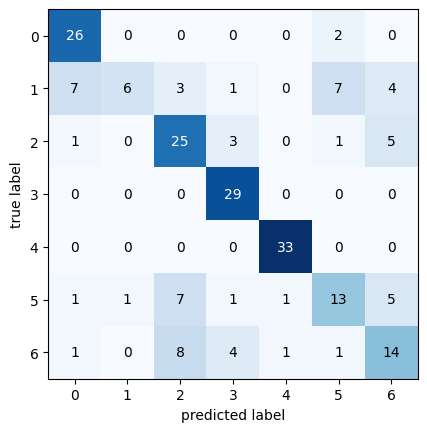

In [62]:
plot_confusion_matrix(cm)

In [63]:
report=metrics.classification_report(y_test,y_pred,output_dict=True)
repo=pd.DataFrame(report)
repo

,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II,accuracy,macro avg,weighted avg
precision,0.722222,0.857143,0.581395,0.763158,0.942857,0.541667,0.500000,0.691943,0.701206,0.701542
recall,0.928571,0.214286,0.714286,1.000000,1.000000,0.448276,0.482759,0.691943,0.684025,0.691943
f1-score,0.812500,0.342857,0.641026,0.865672,0.970588,0.490566,0.491228,0.691943,0.659205,0.665364
support,28.000000,28.000000,35.000000,29.000000,33.000000,29.000000,29.000000,0.691943,211.000000,211.000000
